# Linear Regression

*Regression analysis* is a common statistical process for estimating the relationships between variables. This can allow us to make numeric predictions based on existing training data. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1: Simple Linear Regression

*Simple Linear Regression* predicts a numeric response variable based on a single input variable (feature).

To demonstrate the use of simple linear regression with sci-kit learn, we will first create sample random data using NumPy:

In [7]:
# generate our random data
np.random.seed(0)
x_values = np.random.random(size=(15, 1))
y_values = 3 * x_values.flatten() + 2 + np.random.randn(15)
# turn it into a DataFrame
df1 = pd.DataFrame({'X': x_values.flatten(), 'Y': y_values.flatten()})
df1.head()

,X,Y
0,0.548814,4.130753
1,0.715189,4.724709
2,0.602763,3.626708
3,0.544883,5.044854
4,0.423655,2.896493


First, let's plot the data:

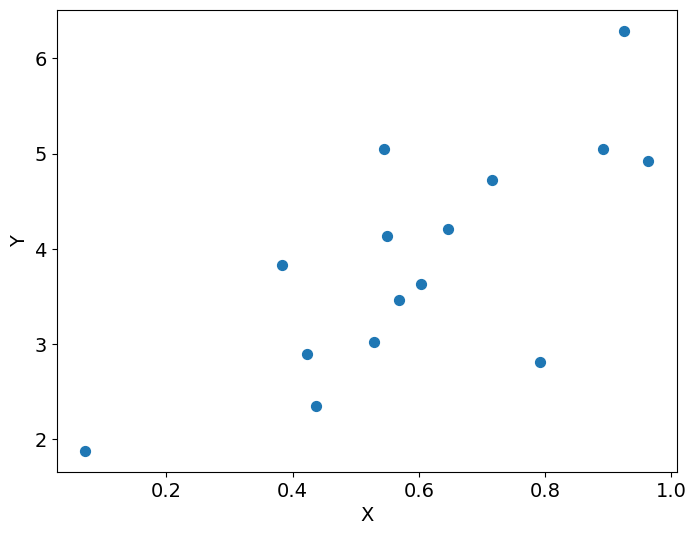

In [9]:
ax = df1.plot.scatter("X", "Y", s=50, figsize=(8,6), fontsize=14)
ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14);

Apply simple linear regression to learn (fit) the model, where *X* is our input variable and *Y* is the target variable that we would like to learn how to predict:

In [15]:
model = LinearRegression()
# extract the column to use our input variable
x = df1[["X"]].values
# extract the column to use as our target variable
y = df1[["Y"]].values
# fit the model
m = model.fit(x, y)

Display the model parameters that we have learned: 

In [21]:
print("Model intercept is %.4f" % model.intercept_)
print("Model slope is %.4f" % model.coef_[0])

Model intercept is 1.6163
Model slope is 3.7616


C:\Users\asus\AppData\Local\Temp\ipykernel_20272\1250354179.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Model intercept is %.4f" % model.intercept_)
C:\Users\asus\AppData\Local\Temp\ipykernel_20272\1250354179.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Model slope is %.4f" % model.coef_[0])


This model can now be use to make predictions for *y* given new values of *x*:

In [23]:
# make a prediction for a single example
x_unseen = np.array([[0.78]]) 
model.predict(x_unseen)

array([[4.55037101]])

In [25]:
# make a prediction for several examples
x_unseen = np.array([[0.78], [0.89], [0.81]])
model.predict(x_unseen)

array([[4.55037101],
       [4.96414674],
       [4.66321893]])

Plot the original data and the model's regression line:

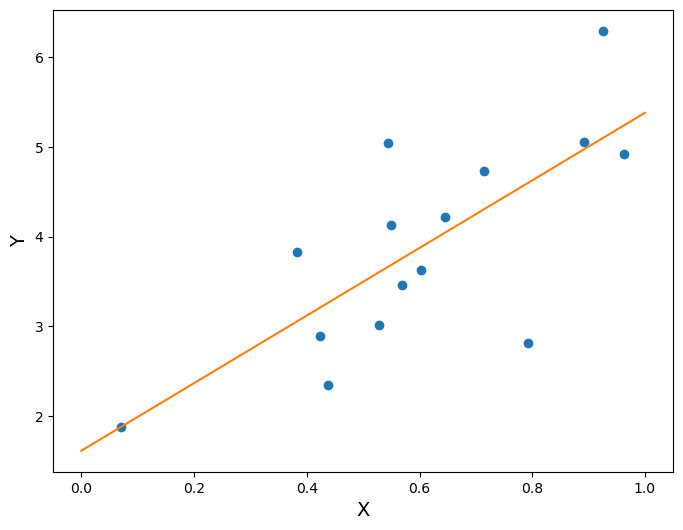

In [41]:
# create predictions which we will use to generate our line
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)
# plot the data
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o')
# plot the line
plt.plot(X_fit, y_fit)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14);

## Example 2: Simple Linear Regression

As a second example, we will examine a dataset of 244 restaurant meals, with details of total meal bill and the corresponding tip amount.

In [45]:
df2 = pd.read_csv("tips.csv")
df2.head(5)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


First, let's plot the data using Matplotlib:

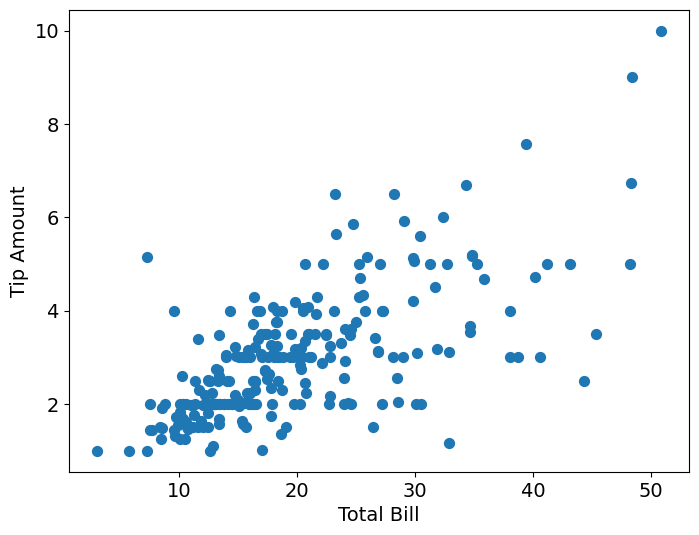

In [47]:
ax = df2.plot.scatter("total_bill", "tip", s=50, figsize=(8, 6), fontsize=14)
plt.xlabel("Total Bill", fontsize=14)
plt.ylabel("Tip Amount", fontsize=14);

From the above, it seems there is a reasonably strong relationship. Let's quantify the level of correlation between the two variables.

In [49]:
df2.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


We could also look at a boxplot of the data, to see if there are outlying values:

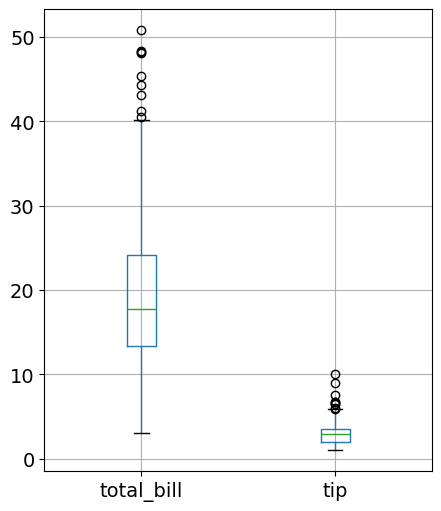

In [51]:
df2.boxplot(figsize=(5,6), fontsize=14);

Now, apply simple linear regression to learn (fit) the model, where *x* (the total bill) is our independent variable and *y* (the tip amount) is the target variable that we would like to learn how to predict:

In [57]:
# note, we need to extract the columns as DataFrames, not Series
x = df2[["total_bill"]].values
y = df2[["tip"]].values

In [59]:
# now build the regression model
model = LinearRegression()
m = model.fit(x, y)

Look at the parameters of the model we learned (the regression line):

In [61]:
print("Model intercept is %.4f" % model.intercept_)
print("Model slope is %.4f" % model.coef_[0])

Model intercept is 0.9203
Model slope is 0.1050


C:\Users\asus\AppData\Local\Temp\ipykernel_20272\1250354179.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Model intercept is %.4f" % model.intercept_)
C:\Users\asus\AppData\Local\Temp\ipykernel_20272\1250354179.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Model slope is %.4f" % model.coef_[0])


Now let's plot the data again, adding our regression line

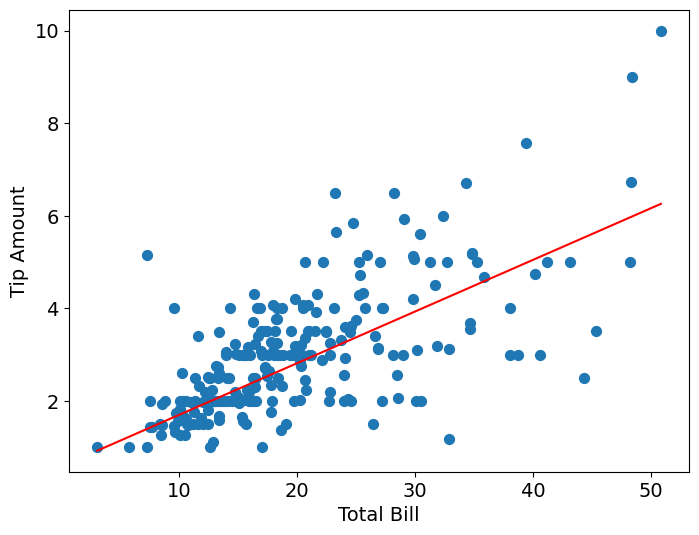

In [63]:
# plot the data
ax = df2.plot.scatter("total_bill", "tip", s=50, figsize=(8, 6), fontsize=14)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel("Total Bill", fontsize=14)
plt.ylabel("Tip Amount", fontsize=14);

We can make predictions from this model for unseen bill examples:

In [65]:
unseen_bills = np.arange(10, 70, 5)
unseen_bills.reshape(-1,1)
for bill in unseen_bills:
    predict_tip = model.predict(np.array([[bill]]))
    print("Predicted tip for meal costing %.2f = %.2f" % (bill,  predict_tip))

Predicted tip for meal costing 10.00 = 1.97
Predicted tip for meal costing 15.00 = 2.50
Predicted tip for meal costing 20.00 = 3.02
Predicted tip for meal costing 25.00 = 3.55
Predicted tip for meal costing 30.00 = 4.07
Predicted tip for meal costing 35.00 = 4.60
Predicted tip for meal costing 40.00 = 5.12
Predicted tip for meal costing 45.00 = 5.65
Predicted tip for meal costing 50.00 = 6.17
Predicted tip for meal costing 55.00 = 6.70
Predicted tip for meal costing 60.00 = 7.22
Predicted tip for meal costing 65.00 = 7.75


C:\Users\asus\AppData\Local\Temp\ipykernel_20272\707345138.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted tip for meal costing %.2f = %.2f" % (bill,  predict_tip))
C:\Users\asus\AppData\Local\Temp\ipykernel_20272\707345138.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted tip for meal costing %.2f = %.2f" % (bill,  predict_tip))
C:\Users\asus\AppData\Local\Temp\ipykernel_20272\707345138.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated N

We can also compare the outputs of our model, with the original data to see if it agrees (note: normally we would use a separate test dataset in a real evaluation).

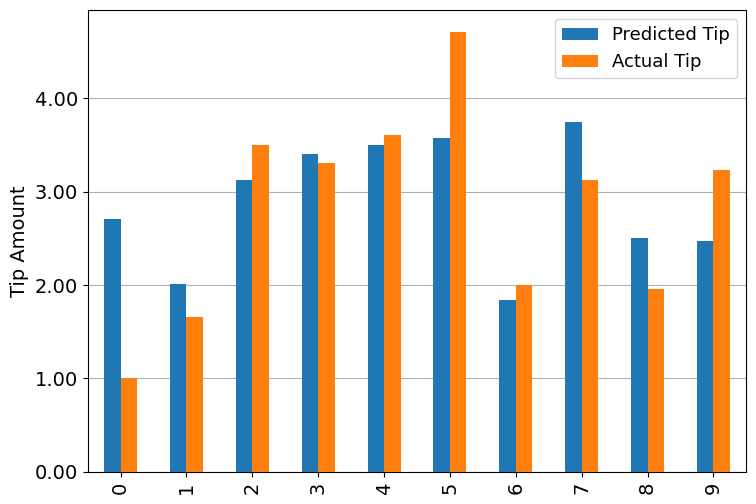

In [67]:
# let's just make predictions for a few rows
comparison = []
for i in range(10):
    # the input variable (the cost of th meal)
    test_x = x[i][0]
    # use the model to 
    predict_y = model.predict(np.array([[test_x]]))[0][0]
    # the correct answer
    actual_y = y[i][0]
    comparison.append( {"Predicted Tip": predict_y, "Actual Tip": actual_y} )
# display the results as a bar chart
df_comparison = pd.DataFrame(comparison)
ax = df_comparison.plot(kind="bar", figsize=(8.5, 6), fontsize=14, zorder=3)
ax.yaxis.grid(True)
ax.legend(fontsize=13)
ax.set_ylabel("Tip Amount", fontsize=14)
ax.yaxis.set_major_formatter("{x:.2f}");

## Example 3: Simple Linear Regression

For our next example, we consider data related 50 US startup companies, where we want to understand how different spending patterns impact on the profits generated by each company. Each row in the dataset represents a company, where the four columns correspond to:
- *R&D:* Amount spent by the company on research and development
- *Admin:* Amount spent by the company on administration activities
- *Marketing:* Amount spent by the company on marketing
- *Profit:* Amount of profit being made by the company

Original dataset source: https://www.kaggle.com/datasets/farhanmd29/50-startups

In [69]:
df3 = pd.read_csv("startups.csv", index_col=0)
df3.head(5)

,R&D,Admin,Marketing,Profit
Company,,,,
1,1000.23,124153.04,1903.93,64926.08
2,78389.47,153773.43,299737.29,111313.02
3,20229.59,65947.93,185265.10,81229.06
4,78013.11,121597.55,264346.06,126992.93
5,0.00,135426.92,0.00,42559.73


We would like to understand the relationship between R&D spending and profit generated by each company. 

First, let's look at the relationship between the two variables visually:

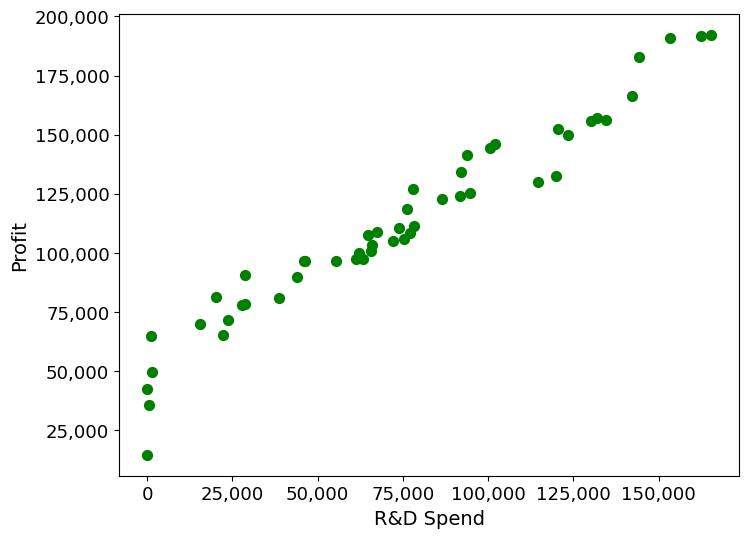

In [71]:
ax = df3.plot.scatter("R&D", "Profit", s=50, figsize=(8, 6), fontsize=13, color="green")
plt.xlabel("R&D Spend", fontsize=14)
plt.ylabel("Profit", fontsize=14)
ax.xaxis.set_major_formatter("{x:,.0f}");
ax.yaxis.set_major_formatter("{x:,.0f}");

Next, we will build a simple linear model which tries to predict profit levels based on R&D spending:

In [73]:
model = LinearRegression()
# create a version of the DataFrame, with a single input variable
x = df3[["R&D"]].values
# fit the model based on the original response variable
m = model.fit(x, df3["Profit"])

In [75]:
print("Model intercept is %.4f" % model.intercept_)
print("Model slope is %.4f" % model.coef_[0])

Model intercept is 49032.8991
Model slope is 0.8543


We can create a plot that shows how the regression line fits to the data for this feature:

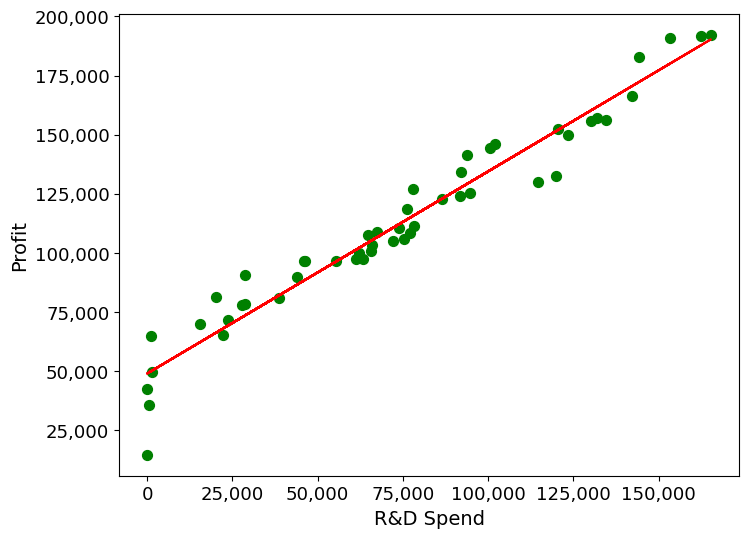

In [77]:
# plot the data
ax = df3.plot.scatter("R&D", "Profit", s=50, figsize=(8, 6), fontsize=13, color="green")
plt.xlabel("R&D Spend", fontsize=14)
plt.ylabel("Profit", fontsize=14)
ax.xaxis.set_major_formatter("{x:,.0f}");
ax.yaxis.set_major_formatter("{x:,.0f}");
# add the predictions from regression
plt.plot(df3["R&D"], model.predict(x), color="red")
plt.show()

Let's try to predict the first five values of the original data (note: normally we would use a separate test dataset in a real evaluation). 

In [79]:
test_x = x[0:5]
predictions = model.predict(test_x)
predictions

array([ 49887.38699921, 116000.34693472,  66314.86331588, 115678.82583435,
        49032.89914125])

We can compare the results to the actual values:

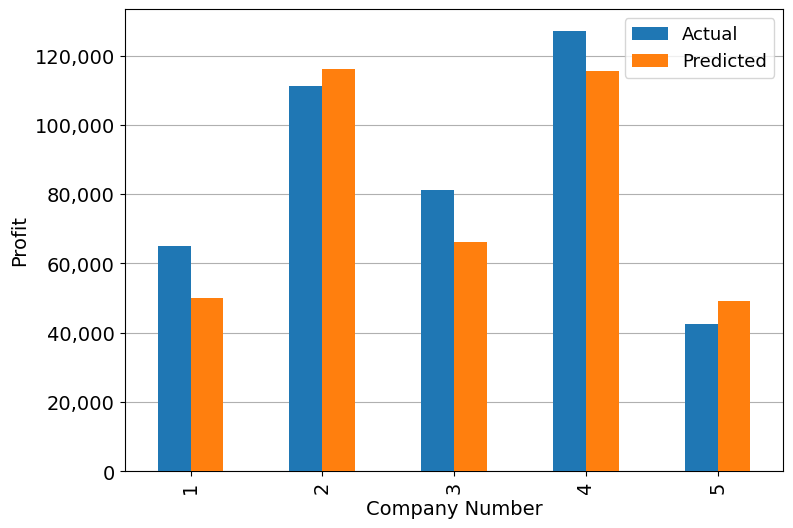

In [81]:
df_comparison = pd.DataFrame({'Actual': df3["Profit"][0:5], 'Predicted': predictions.flatten()})
ax = df_comparison.plot(kind="bar", figsize=(8.5, 6), fontsize=14, zorder=3)
ax.legend(fontsize=13)
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter("{x:,.0f}");
ax.set_xlabel("Company Number", fontsize=14)
ax.set_ylabel("Profit", fontsize=14);

We can now use this to make predictions for new unseen data (new R&D spends):

In [83]:
# generate some data in a realistic range
min_spend, max_spend = df3["R&D"].min(), df3["R&D"].max()
unseen_spends = np.linspace(min_spend, max_spend, 10)
# predict the profits
for spend in unseen_spends:
    prediction = model.predict(np.array([[spend]]))
    print("Predicted profit for R&D spend of %.2f = %.2f" % (spend,  prediction) )

Predicted profit for R&D spend of 0.00 = 49032.90
Predicted profit for R&D spend of 18372.13 = 64728.05
Predicted profit for R&D spend of 36744.27 = 80423.21
Predicted profit for R&D spend of 55116.40 = 96118.36
Predicted profit for R&D spend of 73488.53 = 111813.52
Predicted profit for R&D spend of 91860.67 = 127508.67
Predicted profit for R&D spend of 110232.80 = 143203.83
Predicted profit for R&D spend of 128604.93 = 158898.98
Predicted profit for R&D spend of 146977.07 = 174594.14
Predicted profit for R&D spend of 165349.20 = 190289.29


C:\Users\asus\AppData\Local\Temp\ipykernel_20272\3423720299.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted profit for R&D spend of %.2f = %.2f" % (spend,  prediction) )
C:\Users\asus\AppData\Local\Temp\ipykernel_20272\3423720299.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted profit for R&D spend of %.2f = %.2f" % (spend,  prediction) )
C:\Users\asus\AppData\Local\Temp\ipykernel_20272\3423720299.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (D

We can calculate the overall *mean squared error* between the predictions and the actual profit numbers. This gives us an idea of how well the model based on R&D spend predicts profit (based on our current data). Scikit-learn includes a function to calculate this for us:

In [85]:
predictions = model.predict(x)
mse = mean_squared_error(df3["Profit"], predictions)
print("MSE=%.2f" % mse)

MSE=85120931.33


We can repeat the same process using a different features, such as marketing spend:

In [87]:
# extract the relevant column
x = df3[["Marketing"]].values
# build the model
model = LinearRegression()
m = model.fit(x, df3["Profit"])

When we calculate the overall *mean squared error* between the predictions and the actual profit data, we see that making predictions based on the marketing spend leads to a higher error - i.e. this feature is a less reliable predictor than R&D spend.

In [89]:
predictions = model.predict(x)
mse = mean_squared_error(df3["Profit"], predictions)
print("MSE=%.2f" % mse)

MSE=701870011.20


For real evaluations we would use a separate *test set* to measure the quality of predictions. For instance, we could randomly split the data into 20% test data and use the remaining 80% to train the regression model:

In [91]:
X = df3[["Marketing"]].values
y = df3[["Profit"]]
# split the dataset into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("%d training examples, %d test examples" % (x_train.shape[0], x_test.shape[0]))

40 training examples, 10 test examples


In [93]:
# only build a model on the training set
model = LinearRegression()
m = model.fit(x_train, y_train)

In [95]:
# make the predictions on the test set
predictions = model.predict(x_test)
predictions

array([[134596.93062844],
       [ 93409.42813272],
       [105750.15268558],
       [ 94352.19243159],
       [133074.75621774],
       [174789.49637358],
       [ 67936.35869667],
       [159404.36757874],
       [146211.68414191],
       [129197.68668227]])

Againt we can evaluate the mean squared error between the predictions and the correct answers:

In [97]:
mse = mean_squared_error(y_test, predictions)
print("MSE=%.2f" % mse)

MSE=439323036.59


## Example 4: Multiple Linear Regression

Simple linear regression can easily be extended to include multiple independent features, where we try to learn a model with one coefficient per input feature.

For this example, we will use the previous startups dataset, which has 3 independent features: 

- *R&D:* Amount spent by the company on research and development
- *Admin:* Amount spent by the company on administration activities
- *Marketing:* Amount spent by the company on marketing

In [99]:
df4 = pd.read_csv("startups.csv", index_col=0)
df4.head()

,R&D,Admin,Marketing,Profit
Company,,,,
1,1000.23,124153.04,1903.93,64926.08
2,78389.47,153773.43,299737.29,111313.02
3,20229.59,65947.93,185265.10,81229.06
4,78013.11,121597.55,264346.06,126992.93
5,0.00,135426.92,0.00,42559.73


Before we start making predictions, let's look at the correlations between the different variables in the DataFrame:

In [101]:
df4.corr()

,R&D,Admin,Marketing,Profit
R&D,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


If we want to test making predictions, we need to remove the "Profit" column that we are going to predict. This will be our response (dependent) variable. We keep this separate from the features that are used to make the predictions (i.e. the independent variables), which in this case correspond to R&D, Administration, and Marketing spending.

In [103]:
y = df4["Profit"]
X = df4.drop("Profit", axis=1)
X.head()

,R&D,Admin,Marketing
Company,,,
1,1000.23,124153.04,1903.93
2,78389.47,153773.43,299737.29
3,20229.59,65947.93,185265.10
4,78013.11,121597.55,264346.06
5,0.00,135426.92,0.00


We will train our regression model on 80% of the examples, and keep 20% of the examples aside to test the model. These examples are not made available to the algorithm during training.

In [117]:
# split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("%d training examples, %d test examples" % (X_train.shape[0], X_test.shape[0]))

40 training examples, 10 test examples


Build the regression model on the training data (i.e. all 3 independent variables):

In [107]:
model = LinearRegression()
m = model.fit(X_train, y_train)

Check the coefficients of the model that we have trained. Note that we get 3 different coeffecients now, one per input feature:

In [109]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])

,Coefficients
R&D,0.786660
Admin,-0.017512
Marketing,0.035596


Now make the predictions for the testing data:

In [111]:
y_pred = model.predict(X_test)

Let's compare our prediction for company profits to the correct values from the original dataset:

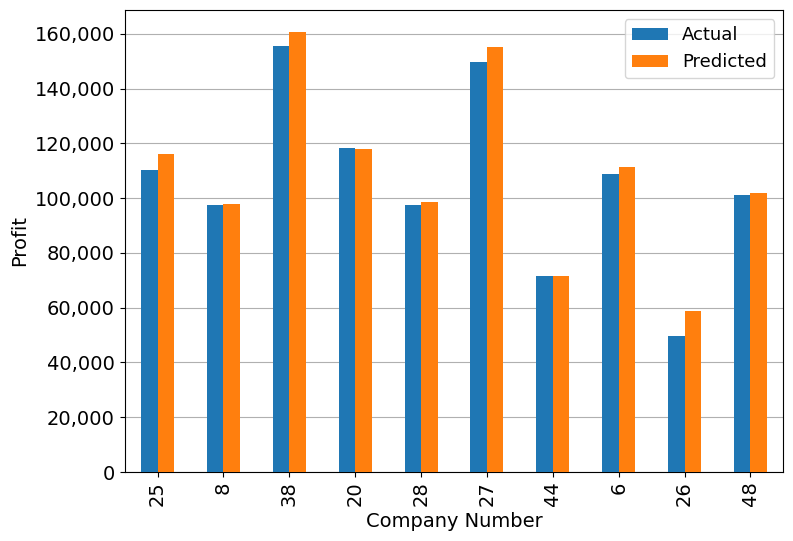

In [113]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
ax = df_comparison.plot(kind="bar", figsize=(8.5, 6), fontsize=14, zorder=3)
ax.legend(fontsize=13)
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter("{x:,.0f}");
ax.set_xlabel("Company Number", fontsize=14)
ax.set_ylabel("Profit", fontsize=14);

Again we could calculate the overall mean squared error to assess the performance of the model:

In [119]:
mse = mean_squared_error(y_test, y_pred)
print("MSE=%.2f" % mse)

MSE=2868788221.22


## Example 5: Multiple Linear Regression

In our final example, we will use a dataset from a bike sharing company, which reports the number of rentals per day and the weather conditions on that day. The goal is to predict the number of rentals per day, based on weather conditions.

The features we will consider are:
- *temp*: normalized temperature in Celsius
- *atemp*: normalized "real feel" temperature in Celsius
- *hum*: normalized humidity level
- *windspeed*: normalized wind speed
- *count*: count of total rental bikes rented on this day

Original data source: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [121]:
df5 = pd.read_csv("bikesharing.csv", index_col=0)
df5.head(5)

,temp,atemp,hum,windspeed,count
day,,,,,
1,0.344167,0.363625,0.805833,0.160446,985
2,0.363478,0.353739,0.696087,0.248539,801
3,0.196364,0.189405,0.437273,0.248309,1349
4,0.200000,0.212122,0.590435,0.160296,1562
5,0.226957,0.229270,0.436957,0.186900,1600


We will first look at the correlations between the different variables in the data. Unsurprisingly, we see that the temperature and "real feel" temperature values are very highly correlated.

In [123]:
df5.corr()

,temp,atemp,hum,windspeed,count
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
count,0.627494,0.631066,-0.100659,-0.234545,1.000000


We remove the "count" column that we are going to predict. This will be our response (dependent) variable. We keep this separate from the weather variables used to make the predictions (i.e. the independent variables).

In [125]:
y = df5["count"]
X = df5.drop("count", axis=1)
X.head()

,temp,atemp,hum,windspeed
day,,,,
1,0.344167,0.363625,0.805833,0.160446
2,0.363478,0.353739,0.696087,0.248539
3,0.196364,0.189405,0.437273,0.248309
4,0.200000,0.212122,0.590435,0.160296
5,0.226957,0.229270,0.436957,0.186900


We will train our regression model on 70% of the examples, and keep 30% of the examples aside to test the model. These examples are not made available to the regression algorithm during training.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("%d training examples, %d test examples" % (X_train.shape[0], X_test.shape[0]))

511 training examples, 220 test examples


Build the regression model on the training data:

In [129]:
model = LinearRegression()
m = model.fit(X_train, y_train)

Check the coefficients of the model that we have trained. Note that we have 4 coeffecients in this case:

In [131]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])

,Coefficients
temp,2660.146004
atemp,4289.220291
hum,-2891.935091
windspeed,-4323.551247


Now make the predictions for the testing data to predict the number of rentals:

In [133]:
y_pred = model.predict(X_test)-=
print("Made predictions for %d test examples" % y_pred.shape[0])

Made predictions for 220 test examples


We can quantitatively look at the level of error in the perdictions by calculating the mean squared error:

In [135]:
mse = mean_squared_error(y_test, y_pred)
print("MSE=%.2f" % mse)

MSE=1784778.69


Finally, we can generate a scatter plot of our predictions versus actual rental counts for the test examples:

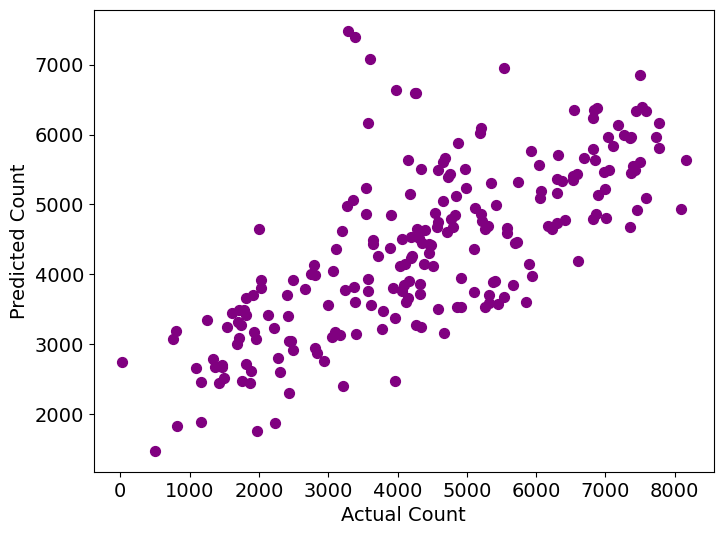

In [137]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
ax = df_comparison.plot.scatter("Actual", "Predicted", fontsize=14, figsize=(8, 6), s=50, color="purple")
plt.xlabel("Actual Count", fontsize=14)
plt.ylabel("Predicted Count", fontsize=14);